In [9]:
from MMNet_TBPTT import *
from networks.denoise.pydl import ResNet_Den
import torch 
from utils import freeze_model

denoiser = ResNet_Den(5, weightnorm=True)
denoiser = denoiser.cuda()
freeze_model(denoiser)

max_iter = 5
mmnet = MMNet(denoiser, max_iter=max_iter)
# mmnet_ckpt_path = "/home/safin/ms-thesis/ckpt/joint_15.04_dnfr/denoiser/weights_10"
mmnet_ckpt_path = "/home/safin/FaceReID/ckpt/mmnet_5it_26.05_2/mmnet/weights_250"
# mmnet_ckpt_path = "/home/safin/ms-thesis/ckpt/20.04_resdnet_5it/denoiser/weights_200"
mmnet_ckpt_path = "/home/safin/FaceReID/ckpt/mmnet_5it_26.05_3/mmnet/weights_20"
mmnet.load_state_dict(torch.load(mmnet_ckpt_path, map_location=lambda storage, loc: storage))
mmnet = mmnet.cuda()

torch.backends.cudnn.benchmark = True 

In [10]:
import torchvision
from torchvision import transforms
transform = transforms.Compose([
                transforms.CenterCrop((112,96)),
                transforms.ToTensor(),
            ])

bayer_noised_data_dir = "/home/safin/datasets/CASIA-WebFace_linRGB/noised_bayer/"
dataset_bayer_noised_val = torchvision.datasets.ImageFolder(bayer_noised_data_dir, transform=transform)

In [11]:
transform = transforms.Compose([
                transforms.CenterCrop((112,96)),
                transforms.ToTensor(),
            ])

linrgb_data_dir = "/home/safin/datasets/CASIA-WebFace_linRGB/gt/"
dataset_linrgb_val = torchvision.datasets.ImageFolder(linrgb_data_dir, transform=transform)

In [12]:
def generate_mask(im_shape, pattern='RGGB'):
    if pattern == 'RGGB':
        # pattern RGGB
        r_mask = torch.zeros(im_shape)
        r_mask[0::2, 0::2] = 1

        g_mask = torch.zeros(im_shape)
        g_mask[::2, 1::2] = 1
        g_mask[1::2, ::2] = 1

        b_mask = torch.zeros(im_shape)
        b_mask[1::2, 1::2] = 1

        mask = torch.zeros(im_shape + (3,))
        mask[:, :, 0] = r_mask
        mask[:, :, 1] = g_mask
        mask[:, :, 2] = b_mask
        
        return mask
M = generate_mask((112, 96), pattern='RGGB').permute(2,0,1).unsqueeze(0).cuda()

In [13]:
imgs_bayer_noisy = dataset_bayer_noised_val[0][0]
out = mmnet.forward_all_iter(255*imgs_bayer_noisy.unsqueeze(0).cuda(), M, init=False, noise_estimation=True).cpu()

In [14]:
out = out.squeeze(0).permute(1,2,0)
out = out.data.numpy()/255

In [15]:
from transforms.conversions import linrgb_to_srgb

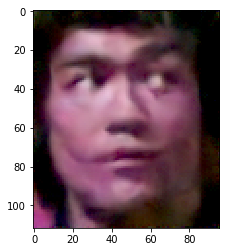

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(linrgb_to_srgb(out)/0.6)

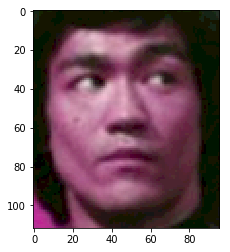

In [17]:
gt = dataset_linrgb_val[0][0]
gt = gt.squeeze(0).permute(1,2,0)
plt.imshow(linrgb_to_srgb(gt)/0.6)

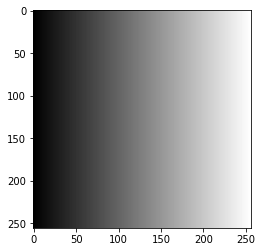

In [23]:
import numpy as np
gradient_img = np.linspace(0,1,256)*np.ones((256,256))
plt.imshow(gradient_img, cmap="gray")

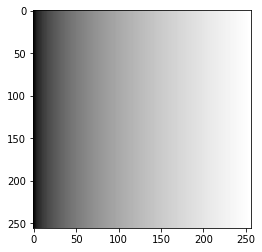

In [22]:
plt.imshow(linrgb_to_srgb(gradient_img), cmap="gray")

Text(0, 0.5, 'df')

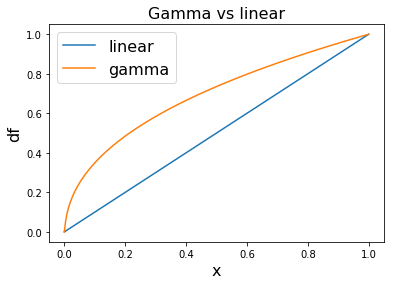

In [105]:
x_arr = np.linspace(0,1,256)
y_arr = x_arr

plt.plot(x_arr, y_arr, label = "linear")
plt.plot(x_arr, linrgb_to_srgb(x_arr), label = "gamma")
plt.legend(fontsize=16)
plt.title("Gamma vs linear", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.ylabel("df", fontsize=16)

In [29]:
x_t.requires_grad

False

In [86]:
x = torch.tensor([1.,2.], requires_grad=True)
t = x.sum()
t.backward()
x.grad

tensor([1., 1.])

In [91]:
x_t

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137,
        0.3176, 0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490,
        0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843,
        0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157, 0.4196,
        0.4235, 0.4275, 0.4314, 0.4353, 

In [92]:
import torch
x_t = torch.tensor(x_arr, requires_grad=True)
y_t = linrgb_to_srgb(x_t)
t = y_t.sum()
t.backward()
x_t.grad

tensor([12.9200, 11.1393,  7.4346,  5.8686,  4.9620,  4.3564,  3.9168,  3.5800,
         3.3117,  3.0918,  2.9075,  2.7503,  2.6142,  2.4949,  2.3894,  2.2951,
         2.2103,  2.1335,  2.0635,  1.9995,  1.9405,  1.8861,  1.8356,  1.7886,
         1.7447,  1.7037,  1.6652,  1.6289,  1.5947,  1.5624,  1.5318,  1.5028,
         1.4752,  1.4490,  1.4239,  1.4001,  1.3773,  1.3554,  1.3345,  1.3144,
         1.2952,  1.2766,  1.2588,  1.2417,  1.2251,  1.2092,  1.1938,  1.1789,
         1.1645,  1.1506,  1.1371,  1.1240,  1.1114,  1.0991,  1.0872,  1.0756,
         1.0643,  1.0534,  1.0428,  1.0324,  1.0224,  1.0125,  1.0030,  0.9937,
         0.9846,  0.9757,  0.9671,  0.9586,  0.9504,  0.9423,  0.9344,  0.9267,
         0.9192,  0.9118,  0.9046,  0.8976,  0.8907,  0.8839,  0.8773,  0.8708,
         0.8644,  0.8582,  0.8520,  0.8460,  0.8402,  0.8344,  0.8287,  0.8231,
         0.8177,  0.8123,  0.8070,  0.8018,  0.7967,  0.7917,  0.7868,  0.7820,
         0.7772,  0.7725,  0.7679,  0.76

Text(0, 0.5, 'df')

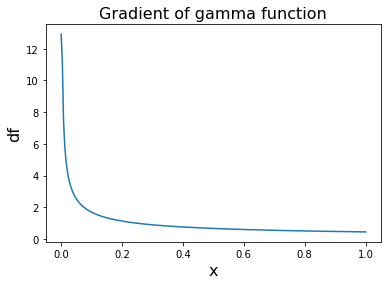

In [100]:
plt.plot(x_arr, x_t.grad.numpy())
plt.title("Gradient of gamma function", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.ylabel("df", fontsize=16)

In [85]:
y_t

tensor([0.0000, 0.0498, 0.0849, 0.1107, 0.1318, 0.1500, 0.1662, 0.1809, 0.1944,
        0.2069, 0.2186, 0.2297, 0.2402, 0.2503, 0.2598, 0.2690, 0.2778, 0.2864,
        0.2946, 0.3026, 0.3103, 0.3178, 0.3251, 0.3322, 0.3391, 0.3459, 0.3525,
        0.3589, 0.3653, 0.3714, 0.3775, 0.3835, 0.3893, 0.3950, 0.4007, 0.4062,
        0.4116, 0.4170, 0.4223, 0.4275, 0.4326, 0.4376, 0.4426, 0.4475, 0.4523,
        0.4571, 0.4618, 0.4665, 0.4711, 0.4756, 0.4801, 0.4845, 0.4889, 0.4932,
        0.4975, 0.5018, 0.5060, 0.5101, 0.5142, 0.5183, 0.5223, 0.5263, 0.5303,
        0.5342, 0.5381, 0.5419, 0.5457, 0.5495, 0.5532, 0.5569, 0.5606, 0.5643,
        0.5679, 0.5715, 0.5750, 0.5786, 0.5821, 0.5856, 0.5890, 0.5924, 0.5959,
        0.5992, 0.6026, 0.6059, 0.6092, 0.6125, 0.6158, 0.6190, 0.6222, 0.6254,
        0.6286, 0.6317, 0.6349, 0.6380, 0.6411, 0.6442, 0.6472, 0.6503, 0.6533,
        0.6563, 0.6593, 0.6622, 0.6652, 0.6681, 0.6710, 0.6739, 0.6768, 0.6797,
        0.6825, 0.6854, 0.6882, 0.6910, 

In [79]:
x_t.grad.numpy()

AttributeError: 'NoneType' object has no attribute 'numpy'

In [3]:
import torchvision
from torchvision import transforms
mmnet_res_path = "/home/safin/datasets/CASIA-WebFace_linRGB/mmnet_output/"
dataset_mmnet_res = torchvision.datasets.ImageFolder(mmnet_res_path, transform=transforms.ToTensor())

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from transforms.conversions import linrgb_to_srgb

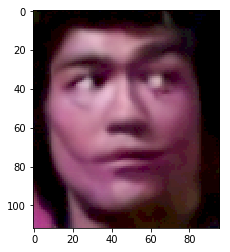

In [5]:
out = dataset_mmnet_res[0][0]
out = out.permute(1,2,0)
plt.imshow(linrgb_to_srgb(out)/0.6)

In [6]:
len(dataset_mmnet_res)

454590

In [7]:
linrgb_to_srgb(out).max()/0.6

tensor(0.9221)

In [8]:
from datasets.noised import DemosaicDataset

train_data_dir = "/home/safin/datasets/CASIA-WebFace_linRGB/"
transform = transforms.Compose([
                 transforms.CenterCrop((112,96)),
                 transforms.ToTensor()
            ])
noised_dataset = DemosaicDataset(train_data_dir, transform)

In [9]:
bayer, gt, _ = noised_dataset[0]
bayer = bayer.permute(1,2,0)
gt = gt.permute(1,2,0)

In [10]:
from transforms.conversions import linrgb_to_srgb

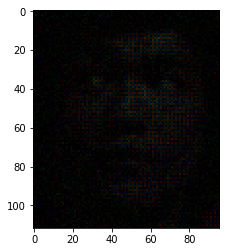

In [11]:

plt.imshow(bayer/255)

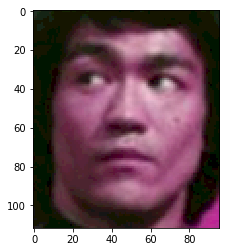

In [12]:
plt.imshow(linrgb_to_srgb(gt/255)/0.6)

In [13]:
_

0

In [17]:
train_data_dir = "/home/safin/datasets/CASIA-WebFace/CASIA-WebFace-sphereface/"
transform = transforms.Compose([
                 transforms.CenterCrop((112,96)),
                 transforms.ToTensor()
            ])
dataset_train = torchvision.datasets.ImageFolder(train_data_dir, transform=transform)

In [10]:
len(dataset_train)

454590

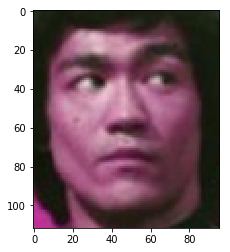

In [11]:
out = dataset_train[0][0]
out = out.permute(1,2,0)
plt.imshow(out)

In [21]:
linrgb_to_srgb(gt/255).max()

tensor(0.5992)

In [33]:
import os
listfiles = []
for root, _, fnames in os.walk("/home/safin/datasets/CASIA-WebFace_linRGB/gt/"):
    for f in fnames:
        listfiles.append(os.path.join(os.path.split(root)[1], f))

In [34]:
listfiles

['3361199/036.png',
 '3361199/023.png',
 '3361199/025.png',
 '3361199/012.png',
 '3361199/029.png',
 '3361199/003.png',
 '3361199/005.png',
 '3361199/017.png',
 '3361199/006.png',
 '3361199/020.png',
 '3361199/027.png',
 '3361199/007.png',
 '3361199/018.png',
 '3361199/016.png',
 '3361199/004.png',
 '3361199/011.png',
 '3361199/002.png',
 '3361199/009.png',
 '3361199/013.png',
 '3361199/019.png',
 '3361199/024.png',
 '3361199/008.png',
 '3361199/034.png',
 '3361199/032.png',
 '3361199/010.png',
 '3361199/014.png',
 '3361199/021.png',
 '3361199/026.png',
 '3361199/037.png',
 '3361199/028.png',
 '3361199/015.png',
 '3361199/038.png',
 '3361199/033.png',
 '3361199/001.png',
 '3361199/030.png',
 '3361199/035.png',
 '3361199/031.png',
 '0596404/036.png',
 '0596404/070.png',
 '0596404/023.png',
 '0596404/040.png',
 '0596404/069.png',
 '0596404/012.png',
 '0596404/029.png',
 '0596404/071.png',
 '0596404/053.png',
 '0596404/003.png',
 '0596404/005.png',
 '0596404/017.png',
 '0596404/006.png',


In [36]:
os.listdir("/home/safin/datasets/CASIA-WebFace_linRGB/gt/"))

['0000045',
 '0000099',
 '0000100',
 '0000102',
 '0000103',
 '0000105',
 '0000107',
 '0000108',
 '0000114',
 '0000117',
 '0000119',
 '0000121',
 '0000133',
 '0000137',
 '0000141',
 '0000143',
 '0000144',
 '0000145',
 '0000147',
 '0000156',
 '0000157',
 '0000159',
 '0000166',
 '0000168',
 '0000169',
 '0000170',
 '0000174',
 '0000177',
 '0000183',
 '0000185',
 '0000186',
 '0000188',
 '0000189',
 '0000192',
 '0000195',
 '0000198',
 '0000202',
 '0000204',
 '0000205',
 '0000207',
 '0000208',
 '0000210',
 '0000211',
 '0000212',
 '0000214',
 '0000220',
 '0000225',
 '0000233',
 '0000238',
 '0000240',
 '0000247',
 '0000249',
 '0000254',
 '0000256',
 '0000260',
 '0000262',
 '0000263',
 '0000268',
 '0000270',
 '0000271',
 '0000272',
 '0000275',
 '0000280',
 '0000281',
 '0000282',
 '0000284',
 '0000286',
 '0000287',
 '0000293',
 '0000295',
 '0000296',
 '0000297',
 '0000299',
 '0000301',
 '0000302',
 '0000304',
 '0000307',
 '0000310',
 '0000317',
 '0000318',
 '0000319',
 '0000321',
 '0000324',
 '00

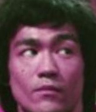

In [15]:
from PIL import Image
Image.open("/home/safin/sphereface/train/data/CASIA-WebFace-112X96/0000045/001.png")